In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import mse, rmse


import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [6]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
houseprice_df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

houseprice_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [7]:
Y = houseprice_df['saleprice']
X = houseprice_df[['overallqual','grlivarea','garagearea','totalbsmtsf','enclosedporch','wooddecksf', 'bedroomabvgr', 'fireplaces']]

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [8]:
x_train = sm.add_constant(x_train)

result = sm.OLS(y_train,x_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     603.5
Date:                Tue, 20 Aug 2019   Prob (F-statistic):               0.00
Time:                        10:33:40   Log-Likelihood:                -13861.
No. Observations:                1168   AIC:                         2.774e+04
Df Residuals:                    1159   BIC:                         2.779e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.981e+04   6023.289    -13.250

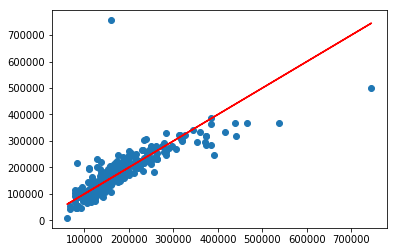

In [12]:
x_test = sm.add_constant(x_test)

# We are making predictions here
y_preds = result.predict(x_test)
from sklearn.linear_model import LinearRegression

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")

In [47]:
from sklearn.linear_model import LinearRegression

lrm = LinearRegression()
lrm.fit(x_train, y_train)

y_preds_train = lrm.predict(x_train)
y_preds_test = lrm.predict(x_test)

lrm.score(x_test, y_test)

#r-squared value for our test set

0.624614136817178

In [16]:
rmse(y_test, y_preds)   

51064.43577615066

In [17]:
mse(y_test, y_preds)    

2607576601.1366158

In [55]:
#Try Lasso and ElasticNet regression using the same model specification. 
#This time, you need to do k-fold cross-validation to choose the best hyperparameter values for your models. 
#Which model is the best? Why?

In [54]:
#Ridge:

In [77]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = Ridge(alpha=10**2) 
ridgeregr.fit(x_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(x_train)
y_preds_test = ridgeregr.predict(x_test)

In [78]:
ridgeregr.score(x_train, y_train)  #new r-squared value on training set

0.8057690693045867

In [79]:
ridgeregr.score(x_test, y_test)    #new r-squared value on testing set

0.6197472105264785

In [42]:
mse(y_test, y_preds_test)          #new mse value

2641384169.188095

In [43]:
rmse(y_test, y_preds_test)          #new rmse value

51394.39822770664

In [51]:
#r-squared values for OLS and ridge are about the same.  However, prediction performance values
#are better for OLS model.

In [53]:
#Lasso:

In [56]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10**2) 
lassoregr.fit(x_train, y_train)

y_preds_train = lassoregr.predict(x_train)
y_preds_test = lassoregr.predict(x_test)

In [57]:
lassoregr.score(x_train, y_train)  #new r-squared value on training set

0.8063986949636645

In [58]:
lassoregr.score(x_test, y_test)    #new r-squared value on testing set

0.6245258923726772

In [59]:
mse(y_test, y_preds_test)          #new mse value

2608189581.4623566

In [60]:
rmse(y_test, y_preds_test)          #new rmse value

51070.437451253114

In [61]:
#still, OLS is better at making prediction performance than ridge and lasso

In [64]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**2, l1_ratio=0.5) 
elasticregr.fit(x_train, y_train)

y_preds_train = elasticregr.predict(x_train)
y_preds_test = elasticregr.predict(x_test)

In [65]:
elasticregr.score(x_train, y_train)  #new r-squared value on training set

0.724394899552035

In [66]:
elasticregr.score(x_test, y_test)    #new r-squared value on testing set

0.4840558747563402

In [67]:
mse(y_test, y_preds_test)          #new mse value

3583949105.254625

In [68]:
rmse(y_test, y_preds_test)          #new rmse value

59866.09311834726

In [72]:
from sklearn.model_selection import KFold

In [80]:
#based on r-squared values and all the prediction performance values,
#OLS model is the best one to go with.